**L073_clustering_evaluation.ipynb**

2024 JUN 11

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# model

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

# training

In [7]:
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

# analysis

In [8]:
iris_df["cluster_id"] = kmeans.labels_  # cluster ID

display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,cluster_id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
iris_df["cluster_id"].value_counts()

cluster_id
0    61
1    50
2    39
Name: count, dtype: int64

# evaluation

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

## silhouette coefficients

In [11]:
silhouette_coefficients = silhouette_samples(iris_dataset.data, iris_df["cluster_id"])
print("silhouette_coefficients.shape:", silhouette_coefficients.shape)

iris_df["silhouette_coeff"] = silhouette_coefficients

silhouette_coefficients.shape: (150,)


In [12]:
display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,cluster_id,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797
3,4.6,3.1,1.5,0.2,1,0.804352
4,5.0,3.6,1.4,0.2,1,0.848918
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.424561
146,6.3,2.5,5.0,1.9,0,0.103125
147,6.5,3.0,5.2,2.0,2,0.316810
148,6.2,3.4,5.4,2.3,2,0.347855


## silhouette score

In [26]:
score = silhouette_score(iris_dataset.data, iris_df["cluster_id"])
print(f"silhouette_score: {score:.6F}")

silhouette_score: 0.551192


In [27]:
# check
iris_df["silhouette_coeff"].mean()

0.551191604619592

In [18]:
iris_df.groupby("cluster_id")["silhouette_coeff"].value_counts()

cluster_id  silhouette_coeff
0           0.237428            2
            0.034193            1
            0.102289            1
            0.550857            1
            0.338565            1
                               ..
2           0.447203            1
            0.448959            1
            0.454841            1
            0.478186            1
            0.606780            1
Name: count, Length: 149, dtype: int64

In [23]:
# iris_df.groupby("cluster_id")["silhouette_coeff"].head()  # (?)

In [22]:
iris_df.groupby("cluster_id")["silhouette_coeff"].mean()

cluster_id
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

<Axes: >

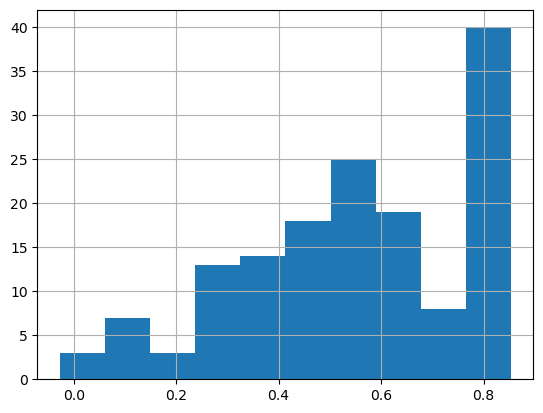

In [28]:
# histogram
iris_df["silhouette_coeff"].hist()